# Simulacion

1. Utilizando random.uniform (numpy), generar un dataset de 500 pares de muestras (X, Y ) de la siguiente
forma: X ∼ U(−1, 1), Y |X = x ∼ N (r(x), σ2) con σ2 = 0.04 y r(x) = x1{x > 0} (funcion conocida
como ReLU).
2. Graficar los datos utilizando scatter (matplotlib).

Text(0.5, 1.0, 'RELU de X sin ruido')

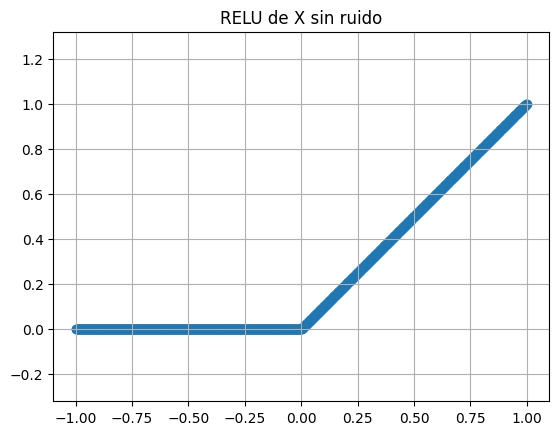

In [8]:
#Importacion de librerias a usar
import numpy as np
import matplotlib.pyplot as plt
#X es la irradiancia neta centrada y escalada entre -1 y 1
#Y es la potencia normalizada.
#Se quiere predecir la potencia producida en funcion de la irradiancia -> Y(X)

##### SIMULACION ######
x_teorico = np.linspace(-1,1,1000)
N = 500 #Cantidad de muestras
x = np.random.uniform(-1,1,N) #Genero 500 muestras entre -1 y 1
sigma2 = 0.04
sigma = np.sqrt(sigma2)
r_x = np.where(x>0,x,0)
r_x_teorico = np.where(x_teorico>0,x_teorico,0)
np.size(x) #500 #4.16845190e-02  2.24231424e-01  3.54854528e-01 -2.21173067e-01
np.size(r_x) #500 #0.45653145 0.         0.         0.         0.         0.

#En r_x ya tengo la relu puesta en el vector x.
plt.scatter(x_teorico,r_x_teorico) #Efectivamente parece ser una relu. ###SUGERENCIA:ESCALAR LOS EJES### graphic context
plt.grid()
plt.axis('equal')
plt.title('RELU de X sin ruido')

Text(0.5, 1.0, 'RELU de X con ruido')

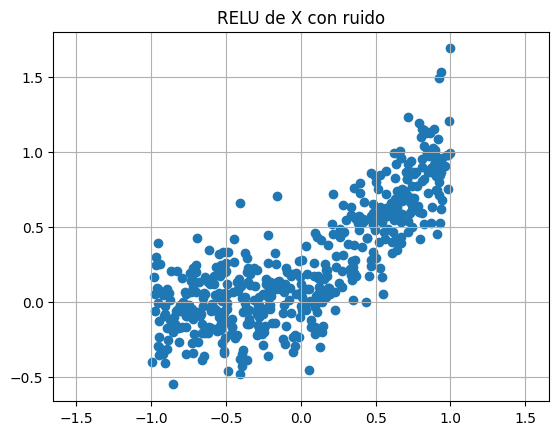

In [9]:
##### Conseguir la normal, deberia estar montada sobre la relu con un poco de ruido aditivo ####
y = np.random.normal(r_x, sigma)
#En r_x ya tengo la relu puesta en el vector x.
plt.scatter(x,y) #Efectivamente parece ser una relu.
plt.grid()
plt.axis('equal')
plt.title('RELU de X con ruido') #Ahora lo tengo centrado en la media de cada muestra con un ruido de sigma 2.

Parte 2: (b) Analisis Teorico:
1. Calcular analıticamente E[X], E[Y], var(X), var(Y) y E[XY]. c: No es necesario ni deseable resolver
integrales con respecto a “y” para computar estas magnitudes.
2. Indicar la funcion de regresion optima y el error bayesaino asociado.
3. ¿Cual es el mejor predictor sin observar X? Comparar el error esperado que comete en comparacion
con el regresor optimo.


1.
Como X se distribuye como una VA uniforme entre -1,1, se puede deducir que la esperanza de X es cero.
$$ E[X] = 0.$$

$$Var(X) = (b-a)^2/12 = (1-(-1))^2/12= 4/12 = 1/3 $$

$$ E[Y] = E[E[Y|X=x]] $$, y la esperanza de $$ Y|X=x $$
Para sacar la esperanza de $$ E[r(X)] $$. La esperanza de X es la esperanza de una indicadora, eso quiere decir que es lo mismo que
por propiedad:


$$ \frac{E[g(x) 1 * {x \epsilon A}]}{P(X \epsilon A)} = E[g(X)|X\epsilon A] $$


Donde la esperanza es la esperanza de la uniforme entre 0 y 1 y la probabilidad de X existir en el semiplano derecho es un medio.

$$ E[g(x) * {x \epsilon A}] =E[g(X)|X \epsilon A ] * P(X \epsilon A) = 1/2 * 1/2 = 1/4 $$

Entonces como la esperanza de una constante es constante:

$$ E[Y] = 1/4 $$

$$ Var[Y] = Var(E[Y|X]) + E(Var[Y|X]) = Var(E[Y|X]) + \sigma^2 $$

$$ Var(E[Y|X]) = E[E[Y|X]^2] - E[E[Y|X]]^2 $$

$$ = E[E[r(X)^2] - (1/4)^2 $$
$$ = E[X^2 * 1 x>0] - 1/4 ^2 $$
$$ = 1/3 * 1/2 - 1/4 ^2  = 1/6 - 1/16 = 5/48 $$


$$ Var[Y] = 5/48 + \sigma^2  = 0.144 $$

$$ g(X) = X^2 $$

$$ var(X) = E[X^2] - E[X]^2 $$ si la esperanza es 0 queda que
$$ var(X) = E[X^2] $$

$$ E[X^2*{x \epsilon A}] = E[X ^ 2 | X ϵ A] * P(XϵA) $$

x^3/3 evaluado entre 1 y 0 multiplicado por la probabilidad de que X exista en el recinto mayor a uno, es decir 1/6

Para sacar la
$$ E[XY] = E[X * E[Y|X]] = E[X * r(X)] = E[X^2 1*X>0] = 1/6 $$


2. La funcion de regresion optima es la que minimice el error cuadratico medio.



Visto en clase:

Regresor  ́optimo: φ(x) = E[Y |X = x]


Error Bayesiano: E[var(Y |X)]


El regresor óptimo se define como la función que minimiza el riesgo esperado bajo el error cuadrático medio (MSE).

Partimos del riesgo esperado:
$$
R(\varphi)\;=\; \mathbb{E}\big[(Y-\varphi(X))^2\big].
$$

Aplicamos descomposición condicional para cada valor fijo \(X=x\):
$$
\mathbb{E}\!\big[(Y-\varphi(x))^2 \mid X=x\big]
=\operatorname{Var}(Y\mid X=x)+\big(\mathbb{E}[Y\mid X=x]-\varphi(x)\big)^2.
$$

Ahora tomamos esperanza respecto de \(X\):
$$
\mathbb{E}\big[(Y-\varphi(X))^2\big]
=\mathbb{E}\!\big[\operatorname{Var}(Y\mid X)\big]
+\mathbb{E}\!\big[\big(\mathbb{E}[Y\mid X]-\varphi(X)\big)^2\big].
$$


Por lo tanto,
$$
\mathbb{E}\big[(Y-\varphi(X))^2\big]\;\ge\;\mathbb{E}\!\big[\operatorname{Var}(Y\mid X)\big],
$$
y la igualdad se alcanza si y solo si
$$
\boxed{\ \varphi(X)=\mathbb{E}[Y\mid X]}
$$

Por lo que es el estimador optimo y el error bayesiano asociado es:

$$
E[Var(Y|X)]
$$


3 Si no observo X, cual es el mejor predictor? Es directamente la esperanza de Y, es mas bien un ejercicio de probabilidad, no viendo los datos decime cuanto debe dar Y. Sin los datos, si no conociendo que su condicionada podemos sacar con el predictor (visto en clase)
El mejor predictor es la esperanza, entonces $\phi(X) = 0.25$ para todo X sin datos extra, el error esperado es directamente la varianza de Y = 0.144
.


# Parte 3: Generar la clase que maneja la logica del predict con productos matriciales

In [10]:
#1. Implementar una regresion lineal (matricial) a partir de los datos generados previamente. El codigo
#debe estar estructurado de la siguiente manera:
class RegLineal:
# Opcional, para inicializar atributos o declarar hiperparametros
  def __init__(self):
    self.params = None #Tiene que arrancar llimpio, despues lo lleno
    self.err = None
    #self.params = [self.w,self.b];
  # Etapa de entrenamiento
  def fit(self,X,y):
    #Le sumo una columna de unos a la X.
    X_ext = np.c_[np.ones((X.shape[0], 1)), X]
    w_ext = np.linalg.pinv(np.matmul(X_ext.T, X_ext)).dot(np.matmul(X_ext.T, y))
    self.params = [w_ext[1],w_ext[0]];#Traigo el primer numero como el peso y el segundo como la ordenada al origen.
  # Etapa de testeo
  def predict(self,X):
    ##Raise exception si es que no tengo seteados los parametros de self.param por si ejecutaron mal el flujo##
    if self.params is None:
      raise Exception("Los parámetros no están inicializados. Ejecuta primero fit.")
    return self.params[0] * X + self.params[1]
  # Computo del error
  def err_predict(self,X,y): #Es la distancia entre la prediccion y cuanto vale el Y para ese dato.
    y_gorro = self.predict(X)
    self.err = np.mean((y - y_gorro)**2)
    return self.err

Error de entrenamiento (MSE):0.058136382521926995
Parámetros aprendidos (b, w): [np.float64(0.5493622492279755), np.float64(0.2535207541337838)]


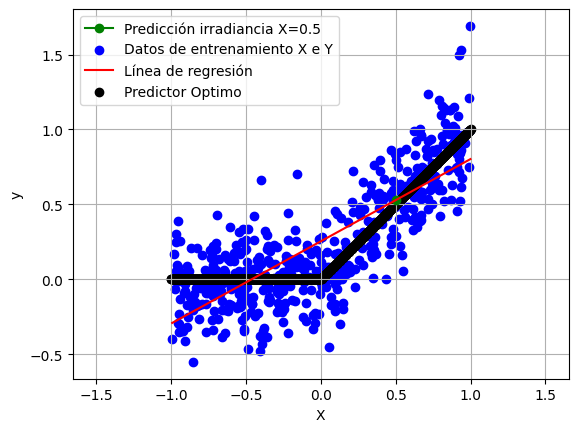

In [11]:
# Crear el objeto regresión lineal
regresion_lineal = RegLineal()
#b)Entrenar la regresi´on lineal con el dataset generado anteriormente.
regresion_lineal.fit(x, y)

#c)Calcular y mostrar el error de entrenamiento
error = regresion_lineal.err_predict(x, y)
print(f"Error de entrenamiento (MSE):{error}")

# Mostrar los parámetros aprendidos (b, w)
print("Parámetros aprendidos (b, w):", regresion_lineal.params)
# Graficar los datos de entrenamiento (scatter)

#D)Utilizar el regresor para predecir la potencia producida para una irradiancia de 0.5
#Predecir el regresor para una irradiancia de 0.5, o sea, un predict con los w, y b ya aprendidos.
irr05 = 0.5
y_05 = regresion_lineal.predict(np.array([[irr05]]))
#e)Graficar el regresor obtenido superpuesto al ´optimo y al scatter.
plt.plot(irr05, y_05, color='green', marker='o', label='Predicción irradiancia X=0.5')
plt.scatter(x, y, color='blue', label='Datos de entrenamiento X e Y')
# Generar la línea de regresión para la predicción
x_line = np.linspace(min(x), max(x), 2)  #Tomo 2 puntos min max (es lo mismo porque ya tengo w)
y_line = regresion_lineal.predict(x_line.reshape(-1, 1))  #Armo la imagen para esos dos con mis parametros

###Genero la lista de X como linspace (diferente a las muestras logicamente), genero la y de imagen con la funcion teorica aplicando la relu.

# Graficar la línea de regresión
plt.plot(x_line, y_line, color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(x_teorico,r_x_teorico,color='black',label='Predictor Optimo')
plt.legend()
plt.grid()
plt.axis('equal')
# Mostrar la gráfica
plt.show()

(d) Gradiente Descendente:
1. Agregar un metodo fit_gradient(self,X,y,learning_rate) a la implementacion desarrollada anteriormente que reemplace el entrenamiento matricial por gradiente descendente.
2. Repetir los puntos 2, 3, 4 y 5 del inciso (c).
3. Graficar la evolucion del parametro w (pendiente de la recta) en funcion del numero de iteraciones.

In [12]:
class RegLineal:
# Opcional, para inicializar atributos o declarar hiperparametros
  def __init__(self):
    self.params = np.zeros((2, 1)) ; #Tiene que arrancar llimpio, despues lo lleno
    self.history_w = np.array([]) #Agrego atributo para poder graficar despues los pesos
    self.err = None
    #self.params = [self.w,self.b];
  # Etapa de entrenamiento

  def fit(self,X,y):
    #Le sumo una columna de unos a la X.
    X_ext = np.c_[np.ones((X.shape[0], 1)), X]
    y = y.reshape(-1,1)
    w_ext = np.linalg.inv(np.matmul(X_ext.T, X_ext)).dot(np.matmul(X_ext.T, y))
    self.params = w_ext;#Traigo el primer numero como el peso y el segundo como la ordenada al origen.

  def fit_gradient(self,X,y,learning_rate=0.01,num_iter=1000):
    #Cantidad de iteraciones maxima y condicion de corte con evolucion baja de los parametros que estan evolucionando.
    #En lugar de entrenar con el fit, entrenamos con gradiente descendiente.
    #Tengo que inicializar el w en algun lugar random y voy ajustandolo con diferentes pasos.
    #wt1 = wt + delta J (wt)
    #Si se define la funcion de perdida como el promedio del ecm H es 2/n X.T X no dep del valor de los parametros
    #Defino la perdida
    X_ext = np.c_[np.ones((X.shape[0], 1)), X]
    y = y.reshape(-1,1) #Esto porque numpy me tiraba alerta de broadcast, tomaba de n, no n,1
    n = X.shape[0]
    self.params = np.zeros((2,1));
    #J = (1/n) * abs(self.params * X_ext - y)**2 #La perdida es el ECM.
    #Necesito conseguir la derivada de  funcion de costo, como es funcion de w (params), me da 2 + todo lo que esta ahi adentro
    for i in range(num_iter):
      self.history_w = np.append(self.history_w,self.params[1])
      grad_J = (2/n) * X_ext.T @ (X_ext @ self.params - y)
      self.params -= learning_rate*grad_J

  # Etapa de testeo
  def predict(self,X):
    if self.params is None:
      raise Exception("Los parámetros no están inicializados. Ejecuta primero fit o fit gradient.")
    X_ext = np.c_[np.ones((X.shape[0], 1)), X]
    return X_ext @ self.params
  # Computo del error

  def err_predict(self,X,y): #Es la distancia entre la prediccion y cuanto vale el Y para ese dato.
    y = y.reshape(-1,1)
    y_gorro = self.predict(X)
    self.err = np.mean((y - y_gorro)**2)
    return self.err


Error de entrenamiento (MSE): 0.05813648152392487
Parámetros aprendidos (b, w): [[0.2535224 ]
 [0.54882688]]


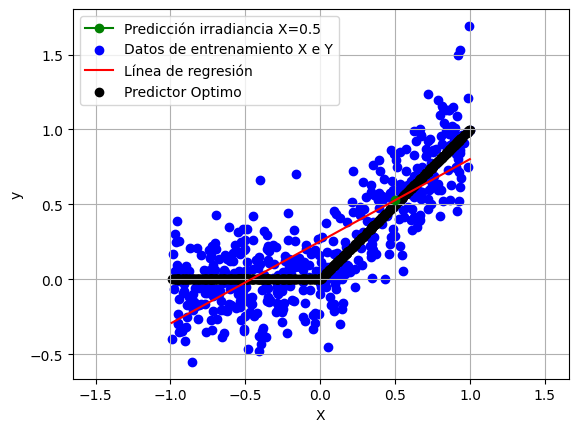

In [13]:
# Crear el objeto regresión lineal
regresion_lineal = RegLineal()
#b)Entrenar la regresi´on lineal con el dataset generado anteriormente.
regresion_lineal.fit_gradient(x, y)

#c)Calcular y mostrar el error de entrenamiento
error = regresion_lineal.err_predict(x, y)
print("Error de entrenamiento (MSE):", error)

# Mostrar los parámetros aprendidos (b, w)
print("Parámetros aprendidos (b, w):", regresion_lineal.params)
# Graficar los datos de entrenamiento (scatter)

#D)Utilizar el regresor para predecir la potencia producida para una irradiancia de 0.5
#Predecir el regresor para una irradiancia de 0.5, o sea, un predict con los w, y b ya aprendidos.
irr05 = 0.5
y_05 = regresion_lineal.predict(np.array([[irr05]]))
#e)Graficar el regresor obtenido superpuesto al ´optimo y al scatter.
plt.plot(irr05, y_05, color='green', marker='o', label='Predicción irradiancia X=0.5')
plt.scatter(x, y, color='blue', label='Datos de entrenamiento X e Y')
# Generar la línea de regresión para la predicción
x_line = np.linspace(min(x), max(x), 2)  #Tomo 2 puntos min max (es lo mismo porque ya tengo w)
y_line = regresion_lineal.predict(x_line.reshape(-1, 1))  #Armo la imagen para esos dos con mis parametros
# Graficar la línea de regresión
plt.plot(x_line, y_line, color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(x,r_x,color='black',label='Predictor Optimo')
plt.legend()
plt.grid()
plt.axis('equal')
# Mostrar la gráfica
plt.show()

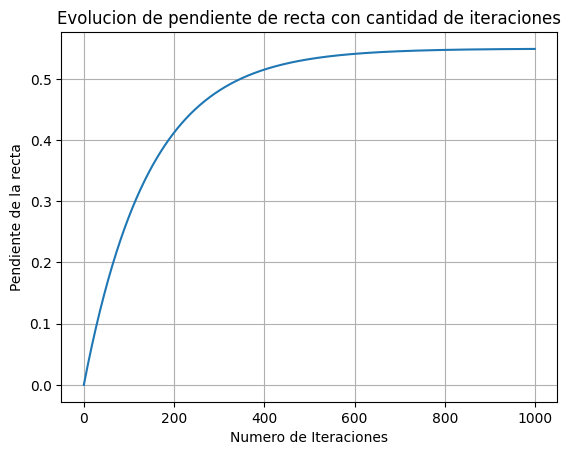

In [14]:
plt.plot(regresion_lineal.history_w)
plt.grid()
plt.title('Evolucion de pendiente de recta con cantidad de iteraciones')
plt.xlabel('Numero de Iteraciones')
plt.ylabel('Pendiente de la recta')
plt.show()